<a href="https://www.kaggle.com/code/darknorth8/titanic-first-project?scriptVersionId=258361724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/d/darknorth8/titanic/train.csv
/kaggle/input/titanic-train-dataset/train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(df.shape)

(891, 12)


we have 891 lines and 12 columns


In [5]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


these are the names of our columns and i will explain each one to you

PassengerId: Unique identifier assigned to each passenger (row number).
Survived: Indicates whether the passenger survived (1 = survived, 0 = did not survive).
Pclass: Passenger ticket class (1 = first class, 2 = second class, 3 = third class).
Name: Full name of the passenger, sometimes including a title (Mr., Mrs., Miss, etc.).
Sex: Gender of the passenger (male or female).
Age: Age of the passenger (in years, decimal values possible for infants).
SibSp: Number of siblings or spouses aboard.
Parch: Number of parents or children aboard.
Ticket: Ticket number purchased.
Fare: Price paid for the ticket (in British pounds).
Cabin: Cabin number(s) assigned to the passenger.
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [6]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


we have 3 columns with missing values(Age,Cabin,Embarked) especially Cabin, the most of its value are null 

In [9]:
print(df.duplicated().sum())

0


0 diplicate rows

In [10]:
df.drop(['Cabin'],inplace=True,axis=1)

the best choice here is to drop the whole column because +600 value is null 

In [11]:
df=df.dropna(subset=['Embarked'])

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

since we have just 2 missing values in this columns we drop the 2 lines 

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


now it's perfect


In [14]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.315152    0.524184   
std     256.998173    0.486260    0.834700   12.984932    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


after cleaning our dataset we take another description better

In [15]:
print(df['Sex'].value_counts())

Sex
male      577
female    312
Name: count, dtype: int64


the most of passangers are males


In [16]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    214
2    184
Name: count, dtype: int64


the lower class has more passangers than the others

In [17]:
print(df['SibSp'].value_counts())

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


most of them have no siblings or spouse

In [18]:
print(df['Parch'].value_counts())

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


same thing for parents or children

In [19]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


The majority of passengers embarked in Southampton.

In [20]:
print(df['Survived'].value_counts())

Survived
0    549
1    340
Name: count, dtype: int64


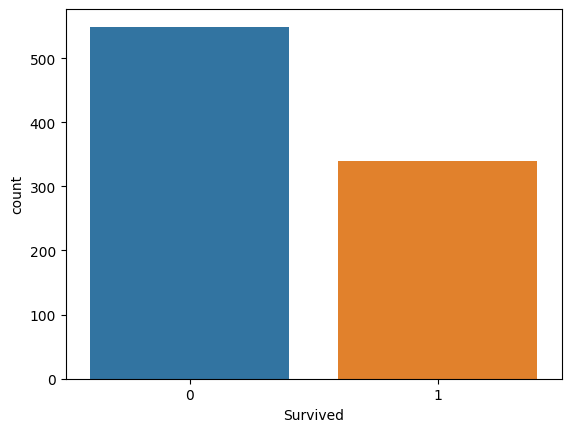

In [21]:
sns.countplot(x='Survived',data=df)
plt.show()


Here is a graphic that shows the number of survivors and deceased passengers. the majority of passangers died in this disaster

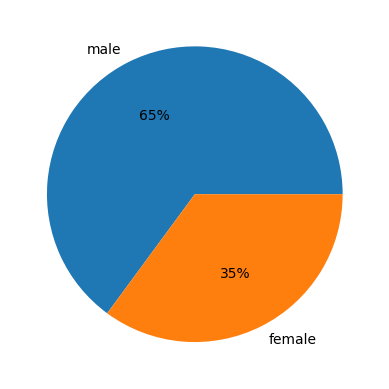

In [22]:
data = df['Sex'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%') 

plt.show()

65% of the passangers are male ,and just 35% are females 

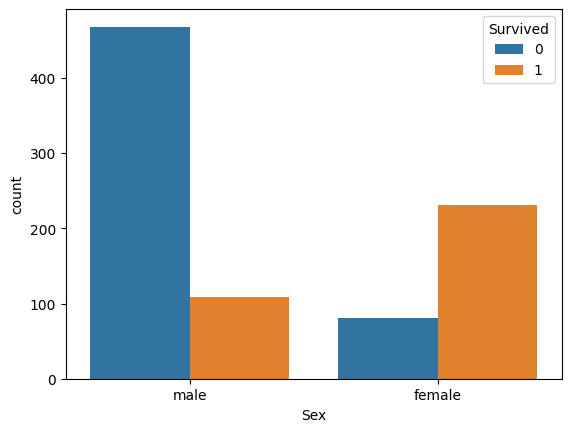

In [23]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

even though the number of males is higher, most of them died ,whereas  most of females survived

([<matplotlib.patches.Wedge at 0x78085dd9c210>,
 [Text(-0.17994396447670752, 1.0851820905490497, '3'),
  Text(-0.5137092106994043, -0.9726781825673871, '1'),
  Text(0.875540033943528, -0.6659051351072208, '2')],
 [Text(-0.09815125335093138, 0.5919175039358452, '55%'),
  Text(-0.2802050240178569, -0.5305517359458475, '24%'),
  Text(0.4775672912419243, -0.3632209827857568, '21%')])

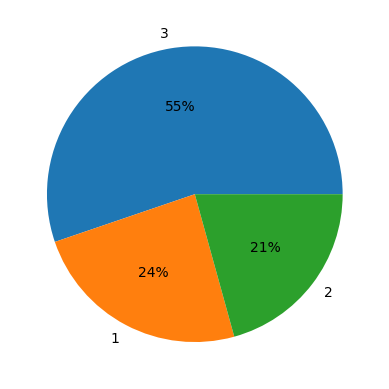

In [24]:
data = df['Pclass'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%') 


The majority of passengers are in the lower class, followed by 24% in the upper class and 21% in the middle class

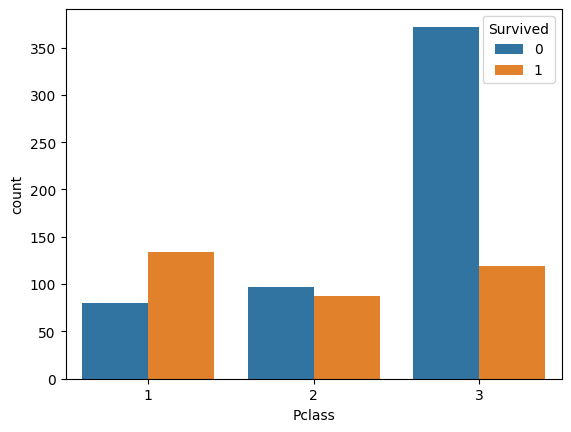

In [25]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

More passengers died in the lower and middle classes, but we observe that the number of deaths is much higher in the lower class, whereas the upper class has more survivors

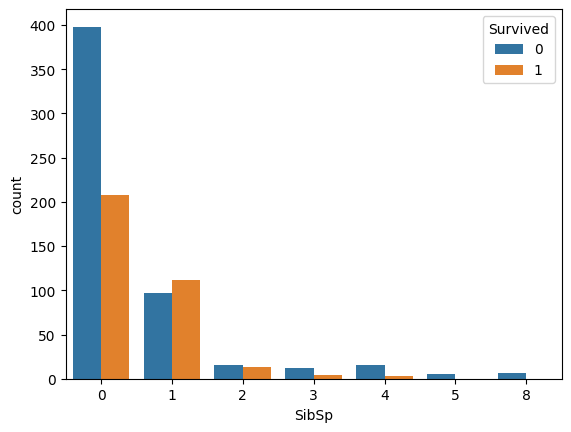

In [26]:
sns.countplot(x='SibSp',hue='Survived',data=df)
plt.show()

Having no siblings or more than four can increase the likelihood of death, while having just one sibling can raise the chances of survival

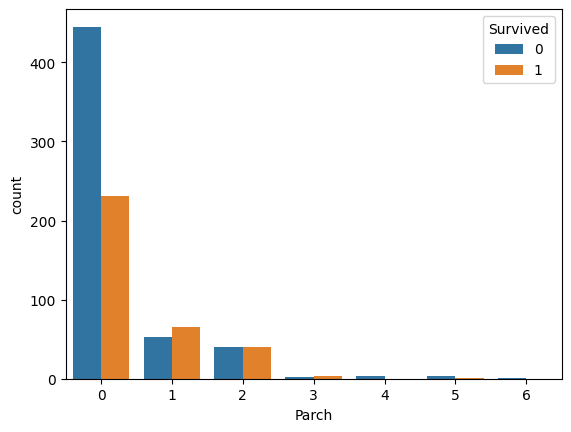

In [27]:
sns.countplot(x='Parch',hue='Survived',data=df)
plt.show()

Having no parents or children can increase the likelihood of death, while having between one and three can raise the chances of survival

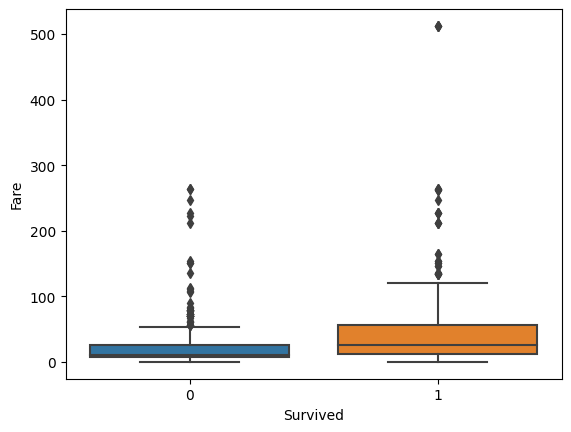

In [28]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.show()

Passengers who paid more had a higher chance of survival

([<matplotlib.patches.Wedge at 0x78085dde2b10>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')],
 [Text(-0.38882172077891114, 0.4569657202138104, '72%'),
  Text(0.25170123050326887, -0.5446526329351032, '19%'),
  Text(0.577924154618944, -0.16125653942702264, '9%')])

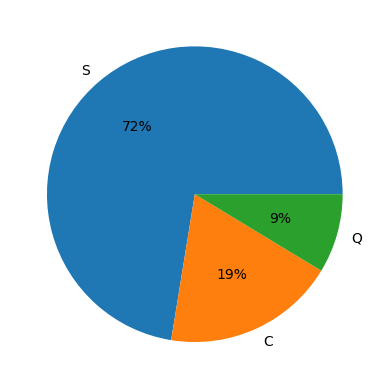

In [29]:
data = df['Embarked'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%') 

As we mentioned before, most passengers embarked in Southampton (72%), followed by Cherbourg with 19% and Queenstown with 9%

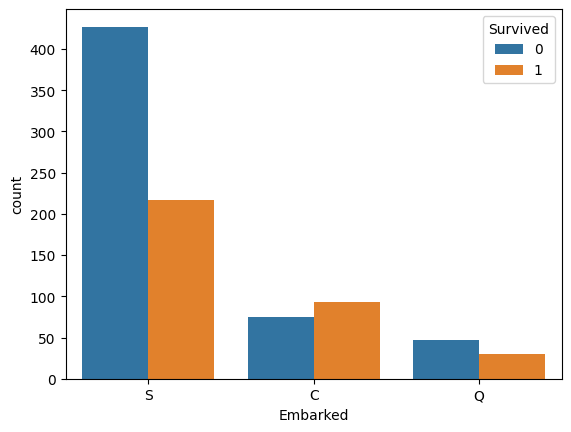

In [30]:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

Southampton has the highest number of deaths, whereas most passengers who embarked at Cherbourg survived

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

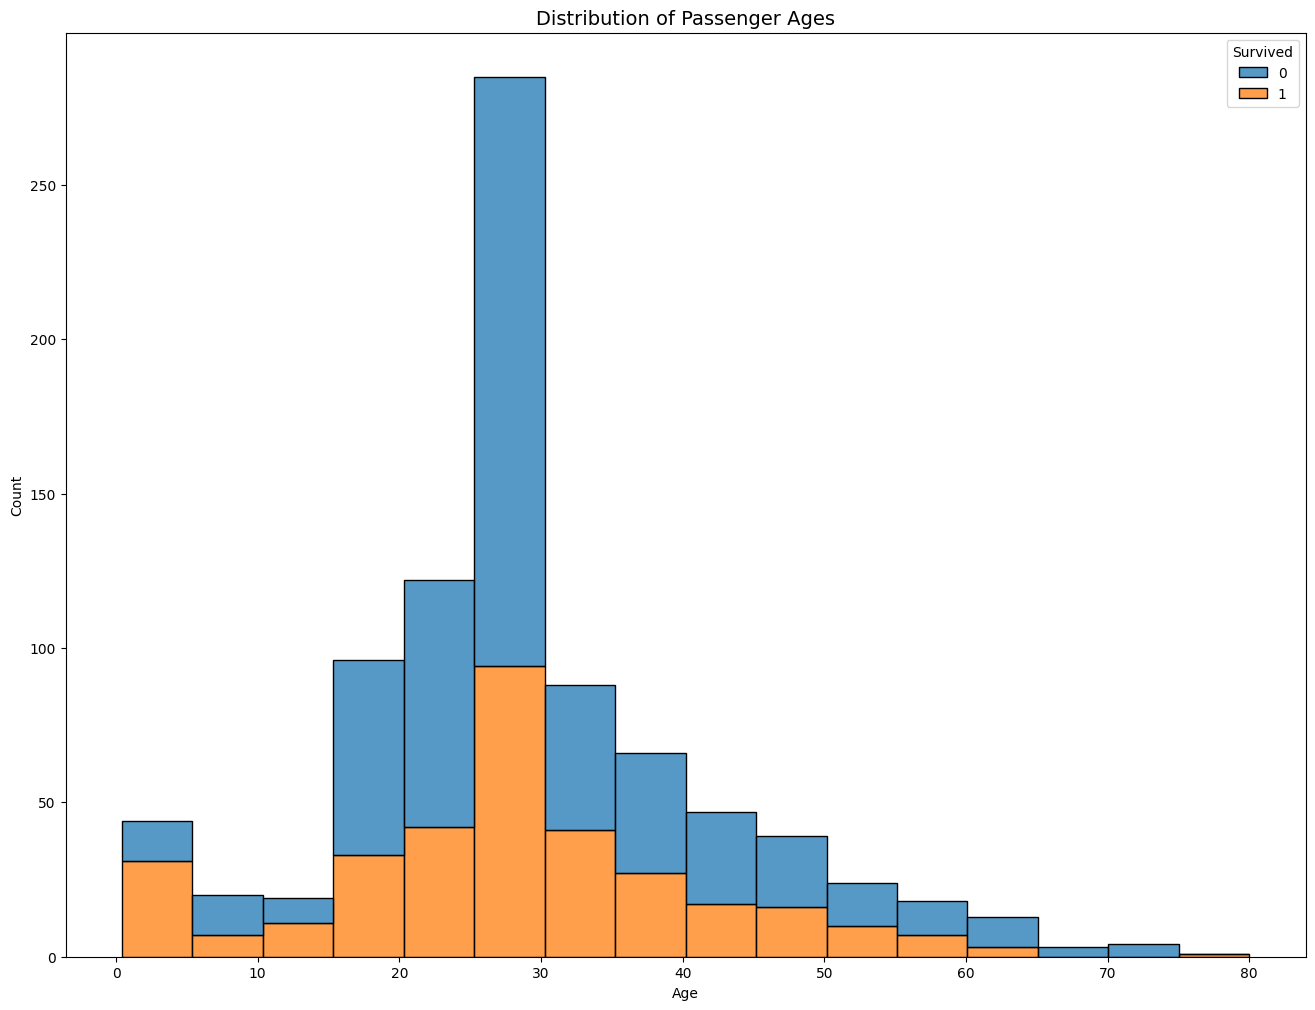

In [31]:
plt.figure(figsize=(16,12))

plt.title('Distribution of Passenger Ages', fontsize=14)

sns.histplot(data=df, x='Age', hue ='Survived', multiple='stack', bins=16)

plt.show()

Most young passengers aged 25 to 30 died, whereas a lot of children aged 0 to 5 and 10 to 15 survived. In contrast, none of the passengers between 65 and 75 years old survived. This indicates that children and the very old passangers had the highest chance of survival

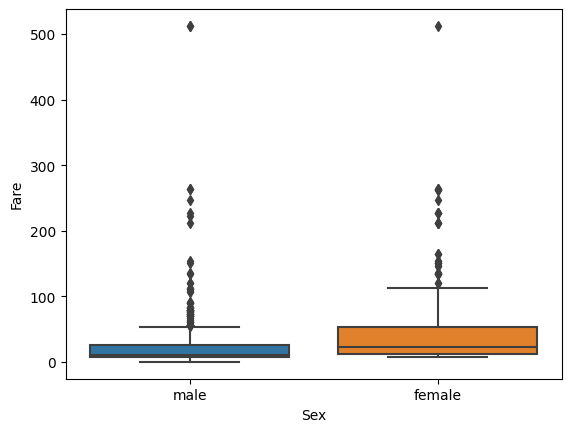

In [32]:
sns.boxplot(x='Sex',y='Fare',data=df)
plt.show()

Females paid more than males, which helps explain the higher number of survivors among females

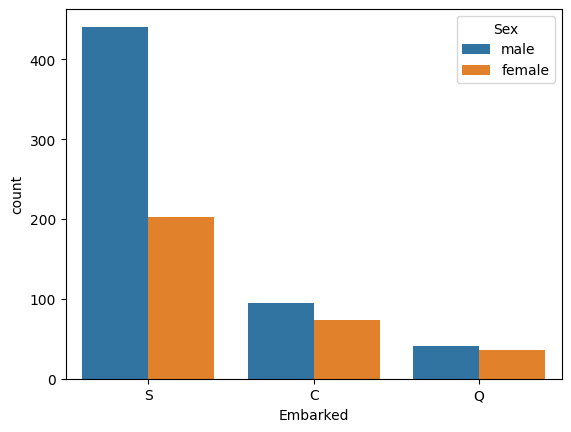

In [33]:
sns.countplot(x='Embarked',hue='Sex',data=df)
plt.show()

Most passengers who embarked at Southampton are male, while the numbers for Cherbourg and Queenstown are very close

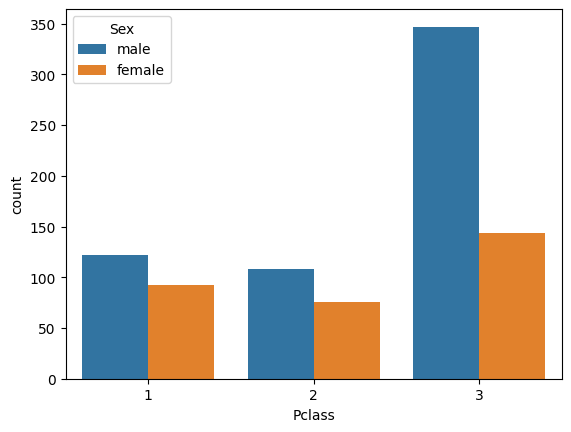

In [34]:
sns.countplot(x='Pclass',hue='Sex',data=df)
plt.show()

The same applies to the three classes. In fact, the influence of sex is very clear, and at this point, we can say that the presence of males increases the number of deaths

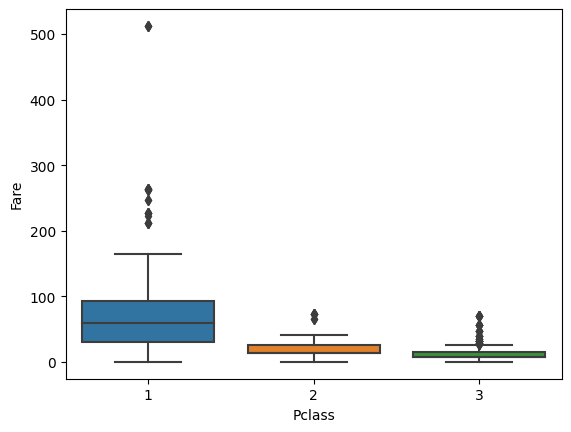

In [35]:
sns.boxplot(x='Pclass',y='Fare',data=df)
plt.show()

clear but useful 

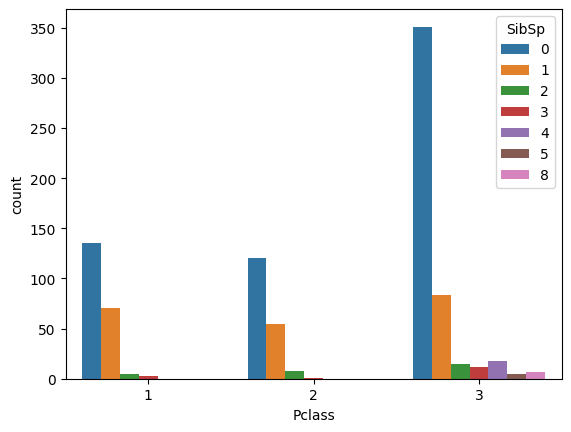

In [36]:
sns.countplot(x='Pclass',hue='SibSp',data=df)
plt.show()

The number of passengers without siblings is higher across all three classes, but it is much greater in the lower class

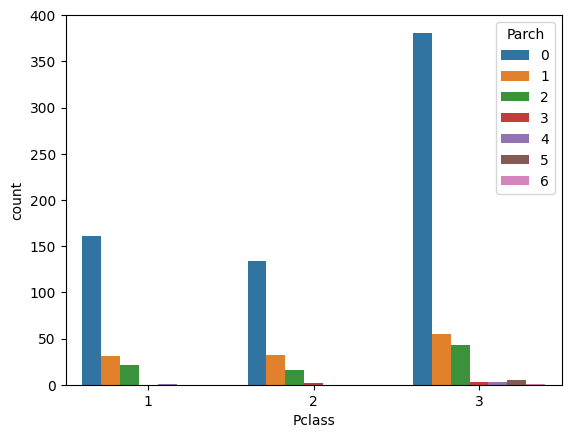

In [37]:
sns.countplot(x='Pclass',hue='Parch',data=df)
plt.show()

same note for parents

In [38]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


Before creating a heatmap to show the strength of relationships between variables, we must convert categorical variables into numerical values to get the best results

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_cols].corr()

we calculate the matrix of correlation

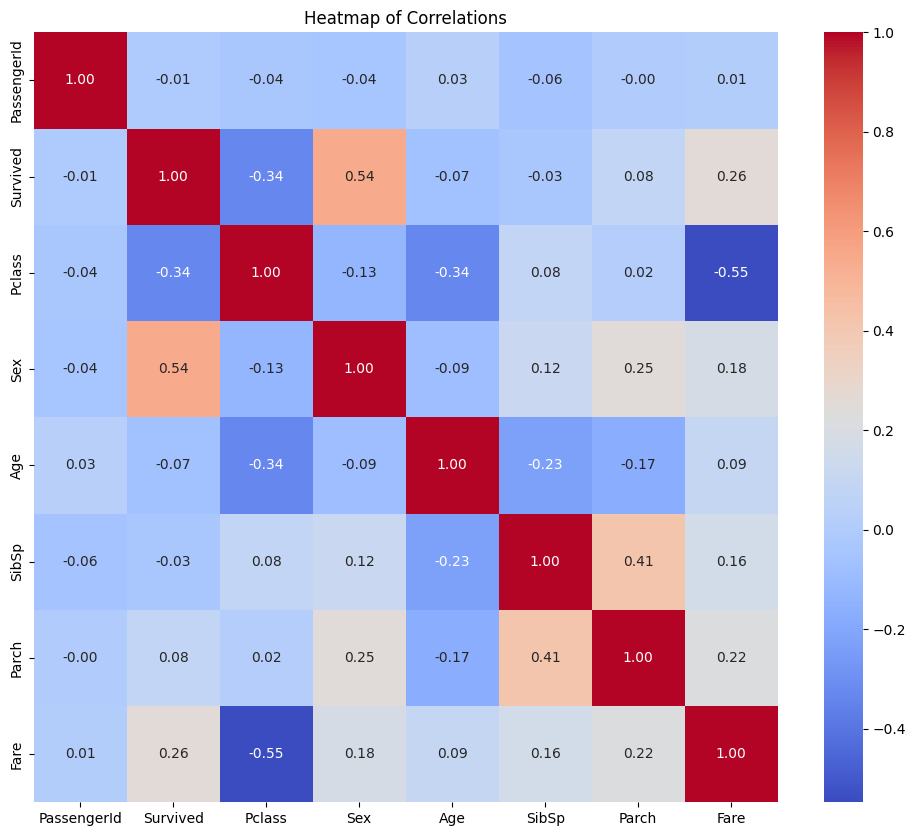

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

This heatmap shows that three variables have the greatest influence on survival: sex, fare, and passenger class (pclass).

In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
X = df[['Sex','Age','FamilySize','IsAlone', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pclass',]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Précision :", accuracy_score(y_test, y_pred))


Précision : 0.797752808988764


Here, we used feature engineering to improve the model’s accuracy, and I tried the simplest classification model: logistic regression

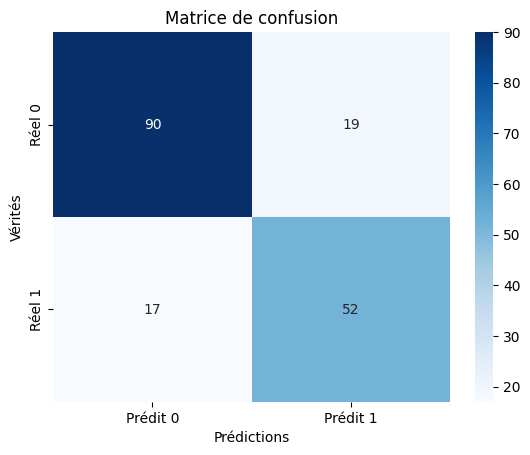

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prédit 0', 'Prédit 1'], yticklabels=['Réel 0', 'Réel 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()

By using the confusion matrix, we can better evaluate our model

In [43]:
X = df[['Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Pclass']]
y = df['Survived']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


print(f"Accuracy Random Forest : {accuracy_score(y_test, y_pred):.2f}")


print(classification_report(y_test, y_pred))

Accuracy Random Forest : 0.81
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.79      0.70      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



Here, I tried the Random Forest model and achieved a better score. This is my best score so far

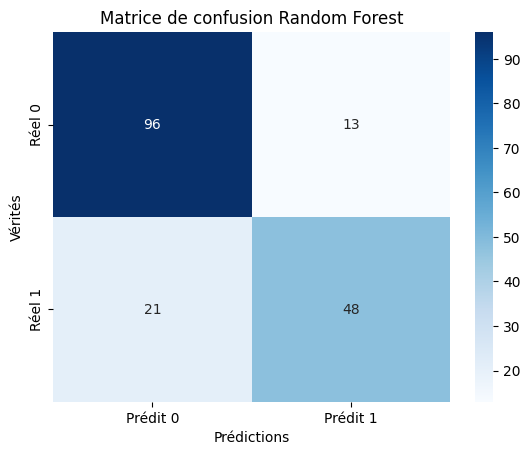

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prédit 0', 'Prédit 1'], yticklabels=['Réel 0', 'Réel 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion Random Forest')
plt.show()

As we can see in this confusion matrix, the results are better than those in the first one